# Predicting Used Car Prices

Suppose we have the following problem:

> Tom wants to sell his car, but doesn't know how much he should sell it for. He wants to sell it for as much as possible, but also have it be reasonably priced so someone would want to purchase it. How can we help Tom determine the best price for the car?

In short: `Can we estimate the price of a used car based on its characteristics?`.

### Data Source

The data can be found at: https://archive.ics.uci.edu/dataset/10/automobile
- We can view the data contents (excludes headers) at: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

### Table of Contents:

- [0. Prerequisites](#0.-Prerequisites)
- [1. Reading the Cleaned Data](#1.-Reading-the-Cleaned-Data)
- [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
  - [2.1 Analysis of Categorical Variables](#2.1-Analysis-of-Categorical-Variables)
    - [2.1.1 Box Charts](#2.1.1-Box-Charts)
    - [2.1.2 Descriptive Statistical Analysis](#2.1.2-Descriptive-Statistical-Analysis)
    - [2.1.3 Grouping](#2.1.3-Grouping)
    - [2.1.4 ANOVA](#2.1.4-ANOVA)
  - [2.2 Analysis of Numeric Variables](#2.2-Analysis-of-Numeric-Variables)
    - [2.2.1 Scatter Plot with Regression Line](#2.2.1-Scatter-Plot-with-Regression-Line)
    - [2.2.2 `corr()` Method](#2.2.2-`corr()`-Method)
    - [2.2.3 Pearson Correlation](#2.2.3-Pearson-Correlation)
    - [2.2.4 Correlation Summary](#2.2.4-Correlation-Summary)
- [3. Conclusion](#3.Conclusion)


<hr />

# 0. Prerequisites

Before you run this notebook, complete the following steps:
- Install Libraries/Packages
- Import Required Modules


### Install Libraries/Packages

This will install all of the libraries/packages used in all of the notebooks for this project.

In [ ]:
! pip install pandas numpy scipy matplotlib seaborn scikit-learn

### Import Required Modules

Import and configure the required modules.

In [70]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reading the Cleaned Data

We start off by reading the cleaned dataset, displaying the first 5 rows, and then taking a look at the inferred columns and column types.

In [8]:
# Define file location.
DATA_PATH = "./automobile_cleaned.csv"
# Use pandas to read the data.
cleaned_data = pd.read_csv(DATA_PATH)
# Display the first 5 rows.
cleaned_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
cleaned_data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# 2. Exploratory Data Analysis

The goal of this step is to get a better understanding of the data and figure out which variables are best suited to be used in the models created later on in order to answer the question: "What are the characteristics that have the most impact on car prices?`.

### 2.1 Analysis of Categorical Variables

There are a couple of ways to analyze whether a categorical variable would be a good predictor:
- Box Charts
- Descriptive Statistical Analysis
- Grouping
- ANOVA

#### 2.1.1 Box Charts

Box charts are a good way of analyzing categorical variables as it makes it easy to spot outliers and see distributions & skewness. If there's significant overlap between distributions, we can assume the variable isn't a good predictor.

Let's analyze the relation between `body-style` & `price`, `drive-wheels` & `price`, and `engine-location` & `price`.

<Axes: xlabel='engine-location', ylabel='price'>

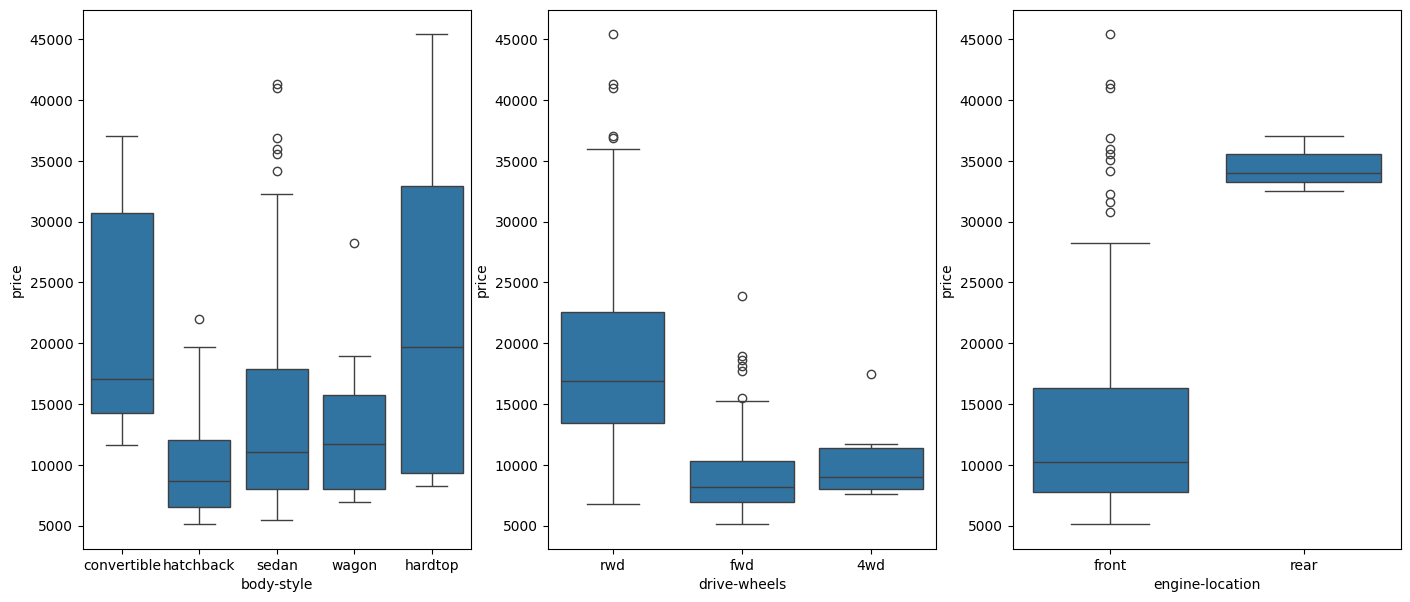

In [22]:
fig, axs = plt.subplots(ncols=3, figsize=(17,7))

# Looking at the relation between `drive-wheels` and `price`.
sns.boxplot(x="body-style", y="price", data=cleaned_data, ax=axs[0])
sns.boxplot(x="drive-wheels", y="price", data=cleaned_data, ax=axs[1])
sns.boxplot(x="engine-location", y="price", data=cleaned_data, ax=axs[2])

From the box plot, we can observe that:
- The distribution of price between different `body-style` categories have significant overlap, making it not a good predictor of price.
- The distribution of price between different `drive-wheels` and `engine-location` categories are distinct enough to be a potential predictor for `price`.

#### 2.1.2 Descriptive Statistical Analysis

When looking at potential predictors, we need to look at some statistical information. We can use the `describe()` method to view some simple statistics.

In [23]:
cleaned_data[["drive-wheels", "engine-location"]].describe()

,drive-wheels,engine-location
count,201,201
unique,3,2
top,fwd,front
freq,118,198


From the above chart, we see that `engine-location` might not be a good predictor as the result is very skewed (there's only 3 entries with "rear" as a value).

So far, `drive-wheels` don't look too skewed. We can further investigate by using the `value_counts()` method.

In [24]:
cleaned_data["drive-wheels"].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

As we can see from above, we notice that the data isn't too skewed. There is the issue with potentially inaccurate results due to not having enough "4wd" entries, but for the other 2 options, it may produce promising results.

#### 2.1.3 Grouping

Grouping data is a technique involving organizing categorical data by one or more variables to help identify patterns, trends, outliers, and relationships in the data.

For example, we can see which combination of `drive-wheels` & `body-style` on average is most valuable by running the following:

In [52]:
grp_test = cleaned_data[["drive-wheels", "body-style", "price"]] \
  .groupby(["drive-wheels", "body-style"], as_index=False).mean()
grp_pivot = grp_test.pivot(index="drive-wheels", columns="body-style").fillna(0)
grp_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

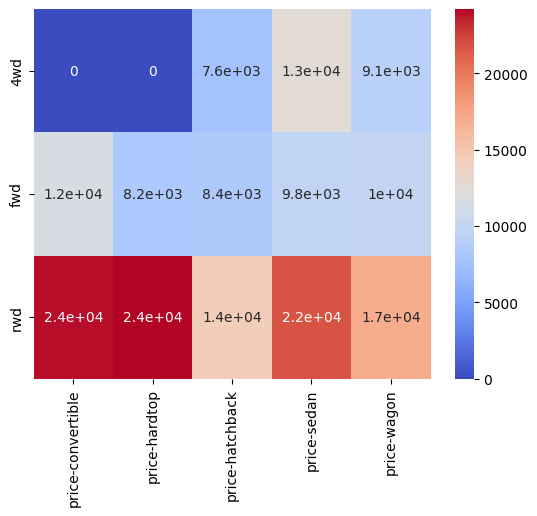

In [45]:
grp_heatmap = sns.heatmap(grp_pivot, annot=True, cmap="coolwarm")
grp_heatmap.set(xlabel=None, ylabel=None)
plt.show()

We can observe from the pivot table and heatmap that rear-wheel drive vehicles on average are the most expensive.

> We should expect that some fields in the pivot table might be empty, in which we can fill the missing cells with 0.

#### 2.1.4 ANOVA

A statistical test used to analyze the difference between the means of 2+ groups. This tells us if the dependent variable changes according to the level of the independent variable. In **one-way ANOVA**, we compare 1 categorical independent variable (**with at least 3 levels/groups/categories**) with a quantitative dependent variable. This will return 2 results:
- **F-Test Score:** ANOVA assumes the means of all groups are the same and calculates how much the actual mean deviates from the assumption (ie: a large *F* indicates a large difference between the means, and thus a strong correlation).
- **P-Value:** Confidence degree; a value below a specific threshold (usually 0.05) suggests the observed difference is statistically significant.

**If the independent variable is strongly correlated with the dependent variable, we expect ANOVA to return a large F-Test Score and a small P-Value.**

For example, let's find out if different types of `drive-wheels` impact `price`.

In [67]:
# Create a new grouping.
grp_test2 = cleaned_data[["drive-wheels", "price"]].groupby(["drive-wheels"])

# Run the ANOVA test between the 3 groups.
f_val, p_val = stats.f_oneway(
  grp_test2.get_group(("fwd",))["price"],
  grp_test2.get_group(("rwd",))["price"],
  grp_test2.get_group(("4wd",))["price"],
  )
print(f"ANOVA results: F = {f_val}, P = {p_val}")

ANOVA results: F = 67.95406500780399, P = 3.3945443577149576e-23


The results displayed above (a large F-Test Score & almost 0 P-Value) indicates a strong correlation with almost certain statistical significance.

However, are all 3 tested groups highly correlated? (ie: which differences are significant?).

In [69]:
# ANOVA test between `fwd` and `rwd`.
f_val, p_val = stats.f_oneway(grp_test2.get_group(("fwd",))["price"], grp_test2.get_group(("rwd",))["price"])
print(f"ANOVA results between `fwd` & `rwd`: F = {f_val}, P = {p_val}")

# ANOVA test between `4wd` and `rwd`.
f_val, p_val = stats.f_oneway(grp_test2.get_group(("4wd",))["price"], grp_test2.get_group(("rwd",))["price"])
print(f"ANOVA results between `4wd` & `rwd`: F = {f_val}, P = {p_val}")

# ANOVA test between `4wd` and `fwd`.
f_val, p_val = stats.f_oneway(grp_test2.get_group(("4wd",))["price"], grp_test2.get_group(("fwd",))["price"])
print(f"ANOVA results between `4wd` & `fwd`: F = {f_val}, P = {p_val}")

ANOVA results between `fwd` & `rwd`: F = 130.5533160959111, P = 2.2355306355677366e-23
ANOVA results between `4wd` & `rwd`: F = 8.580681368924756, P = 0.004411492211225367
ANOVA results between `4wd` & `fwd`: F = 0.665465750252303, P = 0.4162011669784502


From the observed results, we notice that for `4wd` & `fwd` categories, they yielded a high P-Value, which indicates a low F-Test Score. This suggests the difference between the mean yields of these 2 categories isn't statistically significant (ie: can't reject the assumption the means of these 2 groups are the same).

### 2.2 Analysis of Numeric Variables

This can mainly be done by analyzing the correlation of the predictors to the target (`price`). There are different methods of identifying correlation between 2 variables:
- By generating a scatter plot with a regression line.
- Using the `corr()` method.
- Using Pearson Correlation.

#### 2.2.1 Scatter Plot with Regression Line

The regression line characteristic that indicates correlation between 2 variables is the steepness of the slope. A steep slope indicates a strong correlation which can be either positive or negative.

For example, we can see that there's a positive linear relationship between `engine-size` and `price`:

(0.0, 53494.10341152787)

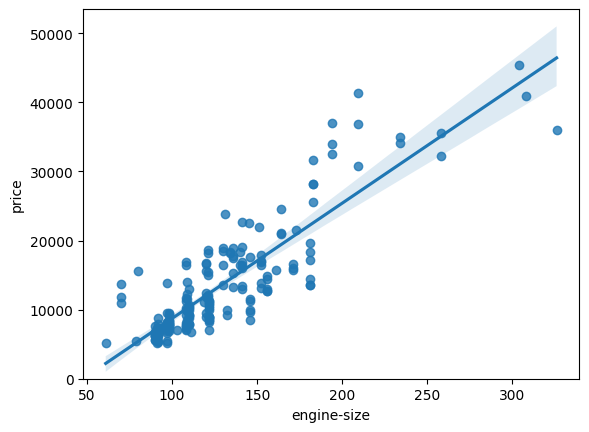

In [46]:
sns.regplot(x="engine-size", y="price", data=cleaned_data)
plt.ylim(0,)

#### 2.2.2 `corr()` Method

We can use the `corr()` method on a dataframe to identify the correlation.

For example, the correlation between `engine-size` and `price` is approximately `0.87`.

In [47]:
cleaned_data[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### 2.2.3 Pearson Correlation

Pearson Correlation is used to measure the linear dependence between 2 variables and tells the significance of the correlation estimate via a Correlation Coefficient and P-Value.
- A Correlation Coefficient close to `±1` indicates a strong correlation.
- A P-Value less than `0.05` means the correlation might be significant, with a value less than `0.001` displaying strong evidence.

With our `engine-size` and `price` example, we can observe that we have a strong positive linear relationship that is statistically significant:

In [50]:
pearson_coeff, p_value = stats.pearsonr(cleaned_data["engine-size"], cleaned_data["price"])
print(f"The Pearson Correlation Coefficient is {pearson_coeff} with a P-Value of {p_value}")

The Pearson Correlation Coefficient is 0.8723351674455185 with a P-Value of 9.26549162219869e-64


#### 2.2.4 Correlation Summary

We can simplify the process of figuring out which variables have a strong correlation to price by creating a giant heatmap for all numeric variables.

> Do note that we might have to check the significance of each correlation by using Pearson Correlation.

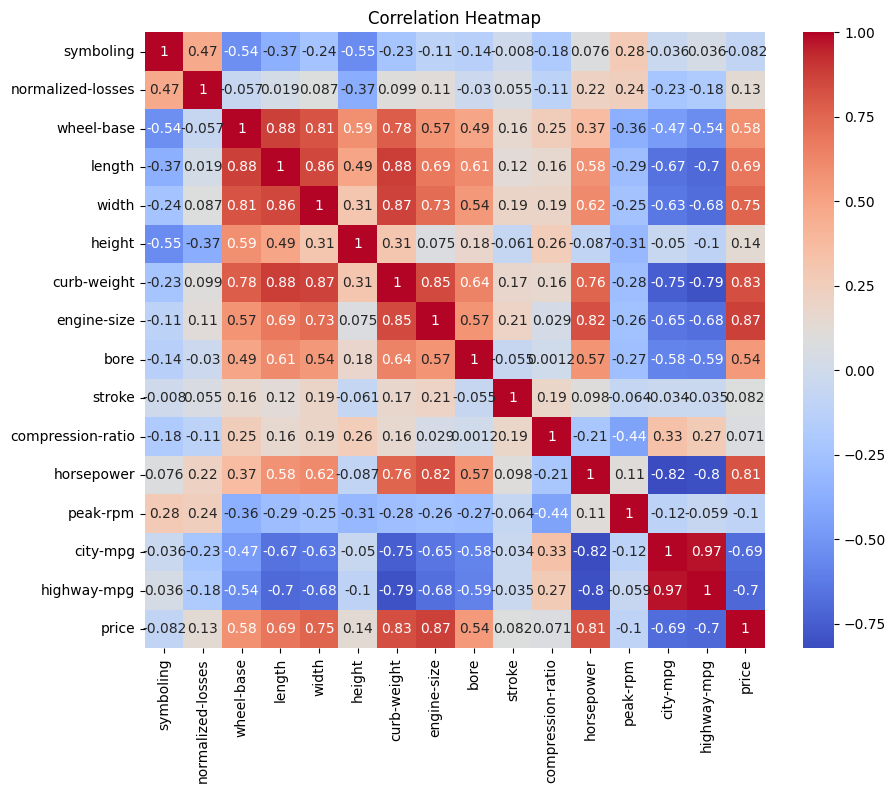

In [51]:
# See correlation for numeric fields
numeric_fields = [
  "symboling", "normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
  ]

# Create heap map
plt.figure(figsize=(10,8))
sns.heatmap(cleaned_data[numeric_fields].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 3. Conclusion

Now, we have a better understanding of what the data looks like. From what we've uncovered, we found that these variables are important to take into account when predicting car prices:
- **Continuous Numerical Variables:** `wheel-base`, `length`, `width`, `curb-weight`, `engine-size`, `bore`, `horsepower`, `city-mpg`, and `highway-mpg`
- **Categorical Variables:** `drive-wheels`